In [21]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [22]:
# Dados
raw_data = pd.read_csv("Example-bank-data.csv")
raw_data
data = raw_data.copy()
data = data.drop(["Unnamed: 0"], axis = 1)
data["y"] = data["y"].map({"yes":1, "no":0})
data

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0
...,...,...
513,204,0
514,806,1
515,290,0
516,473,1


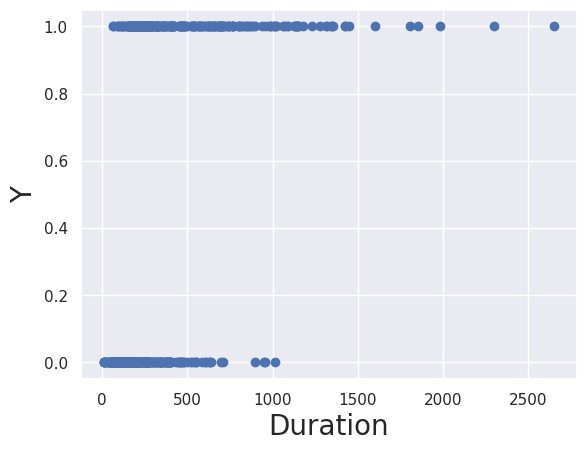

In [23]:
# Visualização dos Dados
y = data["y"]
x1 = data["duration"]
plt.scatter(x1,y)
plt.xlabel("Duration", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


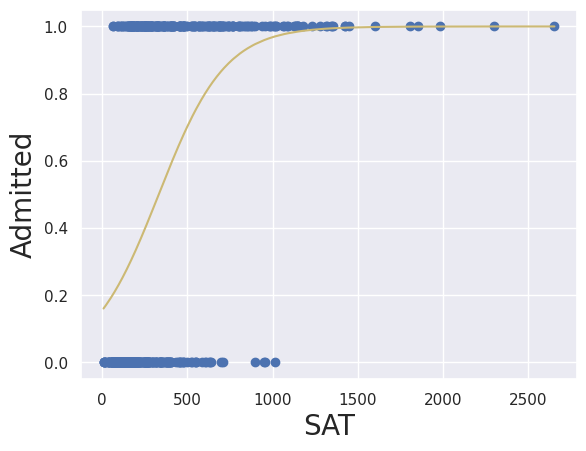

In [24]:
# Regressão Logística
x = sm.add_constant(x1)
results = sm.Logit(y,x).fit()
results.summary()

def f(x,b0,b1):
  return np.array(np.exp(b0 + b1*x) / (1 + np.exp(b0 + b1*x)))

f_sorted = np.sort(f(x1,results.params[0],results.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y, color="C0")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.plot(x_sorted, f_sorted, color="C8")
plt.show()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.2121
Time:                        21:14:54   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""